# Using BLE RSSI Values to Classify Proximity with Deep Neural Networks

In [1]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import visualkeras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rssi_dataset_1.csv")

In [3]:
df

,Unnamed: 0,rssi,target
0,0,-68,1
1,1,-70,1
2,2,-74,1
3,3,-95,0
4,4,-95,0
...,...,...,...
6206,6206,-95,0
6207,6207,-66,1
6208,6208,-96,0
6209,6209,-69,1


In [4]:
train_labels = df['target']
train_samples = df['rssi']

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [6]:
# min max scale
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
scaled_train_samples = train_samples.reshape(-1,1)

In [8]:
print(scaled_train_samples)

[[-68]
 [-70]
 [-74]
 ...
 [-96]
 [-69]
 [-70]]


In [9]:
print(train_labels)

[1 1 1 ... 0 1 1]


## Simple tf.keras Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow import lite

In [11]:
physial_devices = tf.config.experimental.list_physical_devices('GPU')
print("Avaialble: ", len(physial_devices))

Avaialble:  0


In [12]:
# model = Sequential([
#     Dense(units=16, input_shape=(1,), activation='relu'), # first hidden layer - 16 neurons
#     Dense(units=32, activation='relu'),
#     Dense(units=2, activation='softmax')
# ])

In [13]:
model = Sequential([
    Dense(units=128, input_shape=(1,), activation='relu'), # first hidden layer - 128 neurons
    Dropout(rate =  0.25),
    Dense(units=128, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               256       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


In [15]:
visualkeras.layered_view(model) 

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=40, shuffle=True, verbose=2)

Epoch 1/40
559/559 - 1s - loss: 1.3438 - accuracy: 0.5110 - val_loss: 0.6769 - val_accuracy: 0.6495
Epoch 2/40
559/559 - 0s - loss: 0.8585 - accuracy: 0.5407 - val_loss: 0.6775 - val_accuracy: 0.3505
Epoch 3/40
559/559 - 0s - loss: 0.7919 - accuracy: 0.5378 - val_loss: 0.6422 - val_accuracy: 0.6495
Epoch 4/40
559/559 - 0s - loss: 0.7281 - accuracy: 0.5822 - val_loss: 0.6524 - val_accuracy: 0.6495
Epoch 5/40
559/559 - 0s - loss: 0.7196 - accuracy: 0.5820 - val_loss: 0.6172 - val_accuracy: 0.6495
Epoch 6/40
559/559 - 0s - loss: 0.6804 - accuracy: 0.6057 - val_loss: 0.6234 - val_accuracy: 0.9309
Epoch 7/40
559/559 - 0s - loss: 0.6560 - accuracy: 0.6327 - val_loss: 0.5941 - val_accuracy: 0.9984
Epoch 8/40
559/559 - 0s - loss: 0.6351 - accuracy: 0.6613 - val_loss: 0.5741 - val_accuracy: 1.0000
Epoch 9/40
559/559 - 0s - loss: 0.6081 - accuracy: 0.7055 - val_loss: 0.5637 - val_accuracy: 0.6495
Epoch 10/40
559/559 - 0s - loss: 0.5868 - accuracy: 0.7354 - val_loss: 0.5437 - val_accuracy: 1.0000

In [18]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


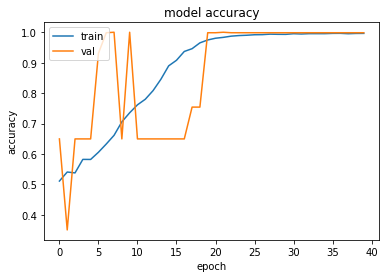

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/accuracy_2denselayers_hiddenlayersize128.png')
plt.show()

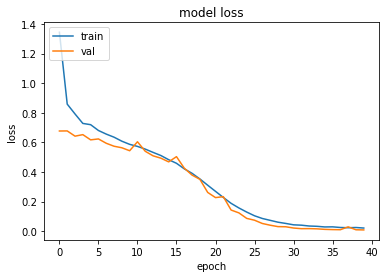

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('plots/loss_2denselayers_hiddenlayersize128.png')
plt.show()

## Predict

In [21]:
prediction = model.predict([-90], verbose=0)

In [22]:
prediction

array([[0.8501092 , 0.14989085]], dtype=float32)

In [23]:
rounded_prediction = np.argmax(prediction, axis=-1)

In [24]:
rounded_prediction

array([0], dtype=int64)

## Export Model

In [25]:
converter = lite.TFLiteConverter.from_keras_model(model)
# tfmodel = converter.convert()
# open("linear.tflite", "wb").write(tfmodel)